In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.options.display.float_format = "{:.2f}".format
sns.set_palette('dark')

In [3]:
df = pd.read_csv(r"/content/drive/MyDrive/Datasets/Customer-Churn-Records.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [5]:
df.shape

(10000, 18)

In [6]:
df.isna().sum().sum()

0

In [7]:
df.duplicated().sum()

0

In [8]:
df.drop(columns = ['CustomerId', 'RowNumber'], inplace = True)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.00,650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,10000.00,38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,10000.00,5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,10000.00,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
NumOfProducts,10000.00,1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,10000.00,0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,10000.00,0.52,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,10000.00,100090.24,57510.49,11.58,51002.11,100193.91,149388.25,199992.48
Exited,10000.00,0.20,0.40,0.00,0.00,0.00,0.00,1.00
Complain,10000.00,0.20,0.40,0.00,0.00,0.00,0.00,1.00


In [10]:
df.groupby('Geography')[df.select_dtypes('number').columns].mean().style.highlight_max(color = 'green').highlight_min(color ='red')

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
Geography,,,,,,,,,,,,
France,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161747,0.161947,3.017750,607.169924
Germany,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432,0.326425,3.005978,610.215225
Spain,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734,0.166734,3.013726,601.441663


In [11]:
df.groupby('Exited')[df.select_dtypes('number').columns].mean().style.highlight_max(color = 'green').highlight_min(color ='red')

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
Exited,,,,,,,,,,,,
0,651.837855,37.408063,5.032781,72742.750663,1.544210,0.707109,0.554635,99726.853141,0.000000,0.001256,3.017960,607.044084
1,645.414622,44.835623,4.934740,91109.476006,1.475466,0.699215,0.360648,101509.908783,1.000000,0.998037,2.997547,604.448479


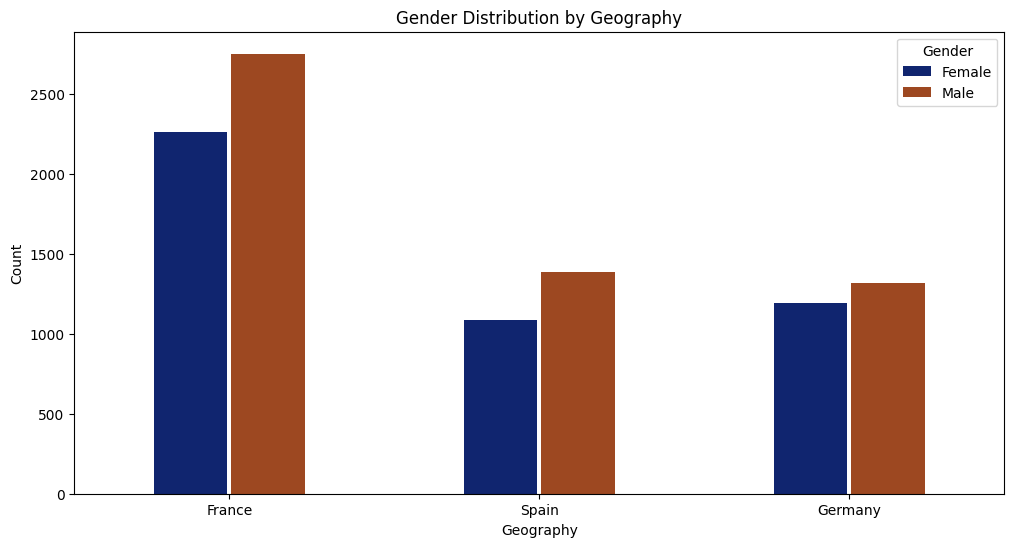

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(x='Geography', hue='Gender', data=df, gap=.05, width=.5)
plt.title('Gender Distribution by Geography')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

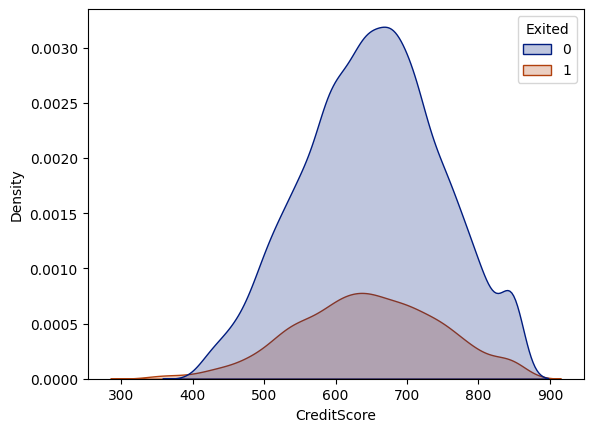

In [13]:
sns.kdeplot(data = df, x = 'CreditScore', fill = True, hue = 'Exited')
plt.show()

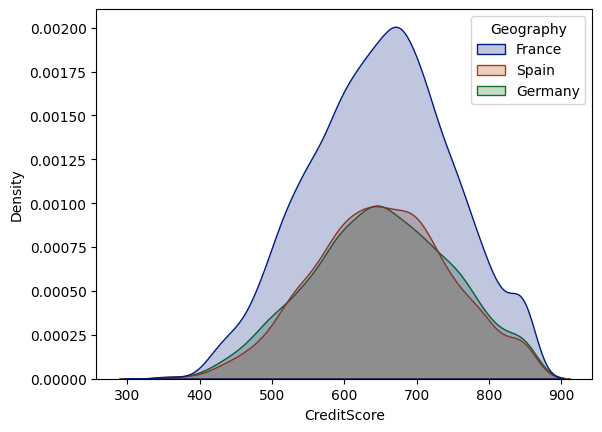

In [14]:
sns.kdeplot(data = df, x = 'CreditScore', fill = True, hue = 'Geography', palette = 'dark')
plt.show()

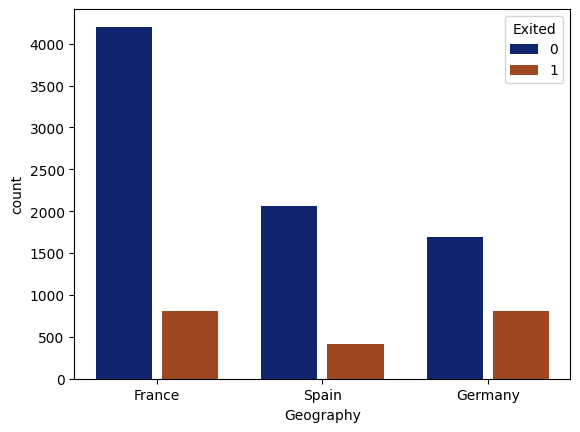

In [15]:
sns.countplot(data = df, x = 'Geography', hue='Exited', gap = .15)
plt.show()

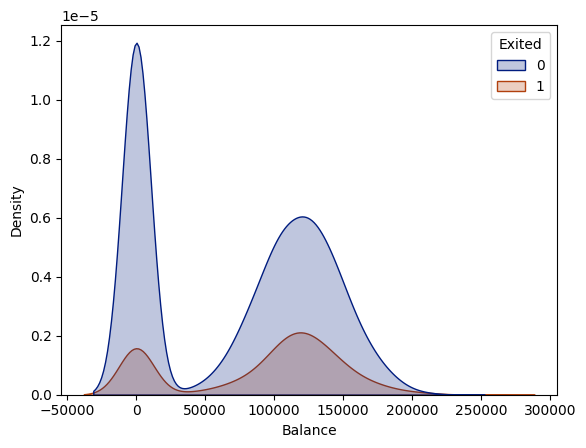

In [16]:
sns.kdeplot(data = df, x= 'Balance', fill = True, hue = 'Exited')
plt.show()

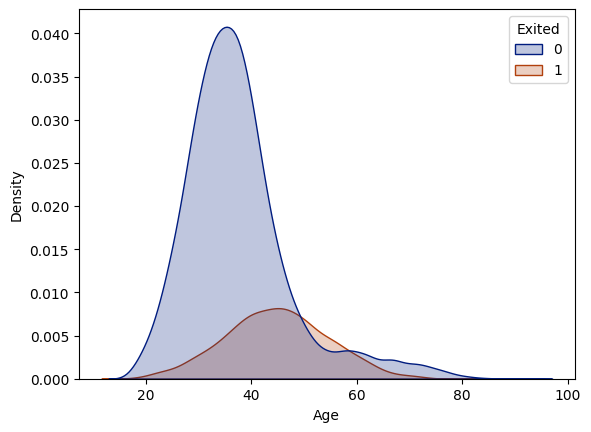

In [17]:
sns.kdeplot(data = df, x= 'Age', fill = True, hue = 'Exited')
plt.show()

In [18]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import make_column_transformer
ColEncObj = make_column_transformer(
    (OrdinalEncoder(dtype=np.int64), [0, 1, 2, 3]),
    remainder = 'passthrough'
)

df[df.select_dtypes('object').columns] = ColEncObj.fit_transform(df.select_dtypes('object'))

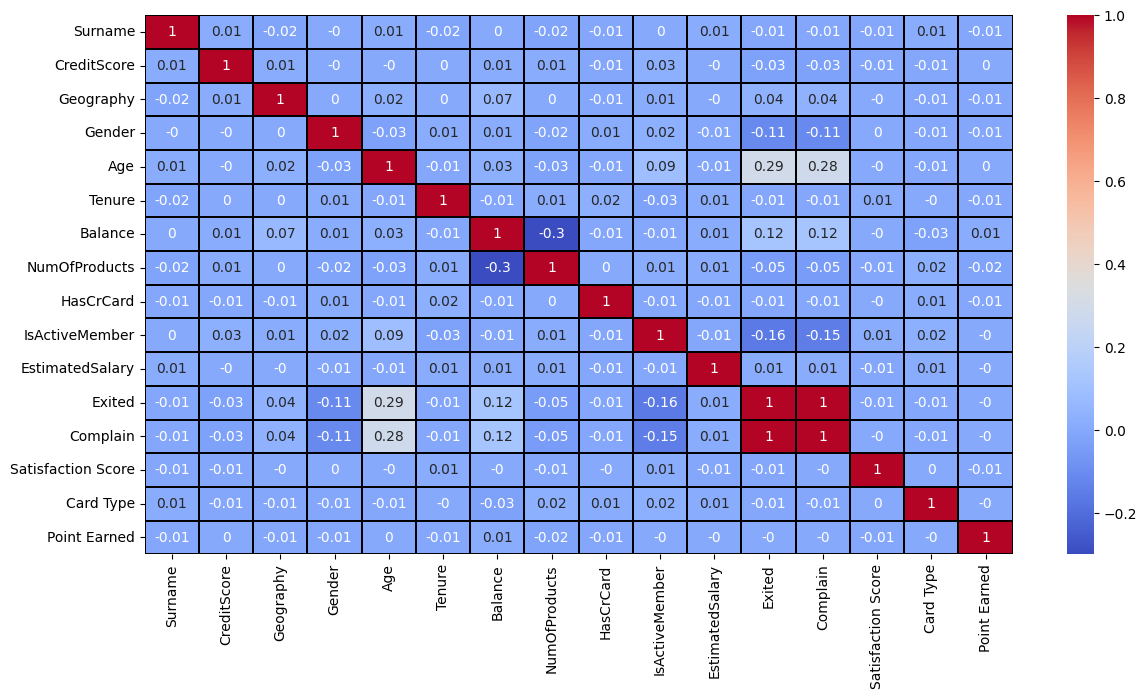

In [19]:
plt.figure(figsize = (14, 7))
sns.heatmap(df.corr().round(2), annot = True, linecolor = 'black', lw = .1, cmap = 'coolwarm')
plt.show()

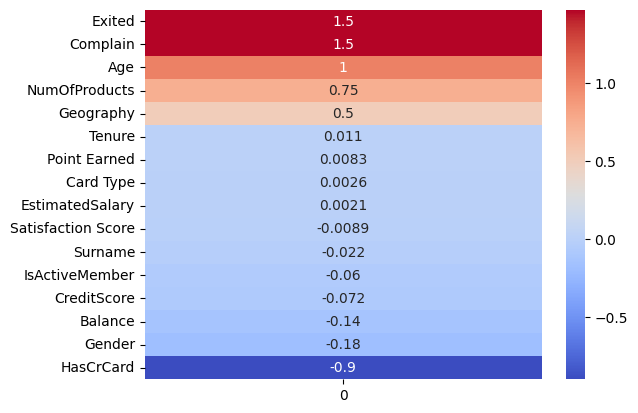

In [20]:
sns.heatmap(df.skew().to_frame().sort_values(by = 0, ascending = False), annot = True, cmap = 'coolwarm')
plt.show()

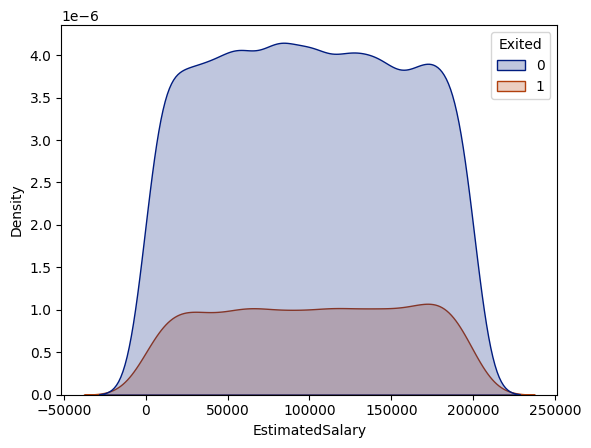

In [21]:
sns.kdeplot(data = df, x= 'EstimatedSalary', fill = True, hue = 'Exited')
plt.show()

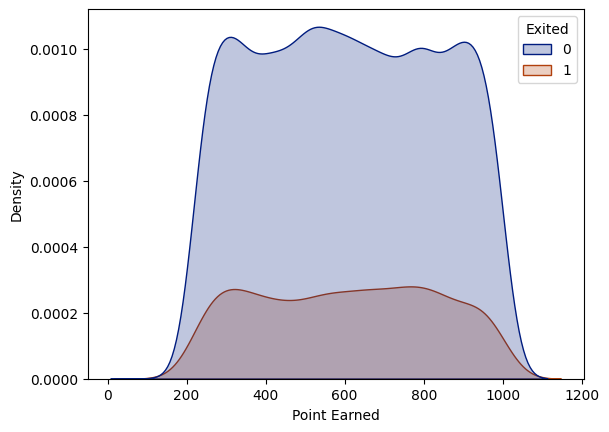

In [22]:
sns.kdeplot(data = df, x= 'Point Earned', fill = True, hue = 'Exited')
plt.show()

In [41]:
df.Exited.value_counts()[0] * 2

15924

In [24]:
X = df.drop(columns = ['Exited'])
y = df.Exited

In [42]:
from imblearn.over_sampling import SMOTE, ADASYN

smote= SMOTE()
Xn, yn = smote.fit_resample(X, y)

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchsummary import summary
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [44]:
X_train, X_val, y_train, y_val = train_test_split(
    np.array(Xn),
    np.array(yn),
    test_size=0.2,
    random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)

train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# Defining the model
class Binclassifier(nn.Module):
    def __init__(self, input_dim):
        super(Binclassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 1)

        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.relu(self.fc4(x))
        x = self.fc5(x)
        return x

# Loss function and optimizer
model = Binclassifier(input_dim=X_train.shape[1])
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adamax(model.parameters(), lr=0.001)

# Training Loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for input, label in train_loader:
        optimizer.zero_grad()

        output = model(input)
        loss = criterion(output, label.unsqueeze(1))
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Average Loss: {avg_loss:.5f}')

# Evaluation
all_preds = []
all_labels = []
all_logits = []
with torch.no_grad():
    model.eval()
    total_loss = 0
    for input, label in val_loader:
        output = model(input)
        loss = criterion(output, label.unsqueeze(1))
        total_loss += loss.item()

        probs = torch.sigmoid(output)
        preds = (probs > 0.5).int()

        all_logits.extend(probs.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(label.cpu().numpy())

    avg_val_loss = total_loss / len(val_loader)
    print()
    print(f'Validation Loss: {avg_val_loss:.5f}')

# Metrics Calculation
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)
auc = roc_auc_score(all_labels, all_logits)

print()
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'AUC: {auc:.4f}')

Epoch [1/10], Average Loss: 0.09368
Epoch [2/10], Average Loss: 0.01881
Epoch [3/10], Average Loss: 0.01716
Epoch [4/10], Average Loss: 0.01503
Epoch [5/10], Average Loss: 0.01320
Epoch [6/10], Average Loss: 0.01308
Epoch [7/10], Average Loss: 0.01231
Epoch [8/10], Average Loss: 0.01122
Epoch [9/10], Average Loss: 0.01147
Epoch [10/10], Average Loss: 0.01055

Validation Loss: 0.00684

Accuracy: 0.9991
Precision: 0.9987
Recall: 0.9993
F1-score: 0.9990
AUC: 0.9997


In [45]:
summary(model, X_train.shape)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1           [-1, 12739, 128]           2,048
              ReLU-2           [-1, 12739, 128]               0
           Dropout-3           [-1, 12739, 128]               0
            Linear-4           [-1, 12739, 256]          33,024
              ReLU-5           [-1, 12739, 256]               0
            Linear-6           [-1, 12739, 128]          32,896
              ReLU-7           [-1, 12739, 128]               0
           Dropout-8           [-1, 12739, 128]               0
            Linear-9            [-1, 12739, 64]           8,256
             ReLU-10            [-1, 12739, 64]               0
           Linear-11             [-1, 12739, 1]              65
Total params: 76,289
Trainable params: 76,289
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.73
Forward/ba

In [46]:
torch.save(model.state_dict(), 'model.pth') # model saved :)